###Readme
Code to make a databse with your own webcam. It is prepared to make the fingers database, which consists of 2000 images with shape 64x64 of fingers signaling a number from 0 to 5.

It doesn't work on google colab, but could be modified easily

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

import cv2
import time

import h5py
import glob

In [ ]:
from herr import *

# Take photos

In [ ]:
num=0

In [ ]:
from IPython.display import clear_output

camera = cv2.VideoCapture(0)


repeticiones = 420
for i in range(num,num+repeticiones):
    

    print(i%6, end = "   ")
    print(i, end = "  ")
    
    time.sleep(1.3)

    camera.read()
    return_value, image = camera.read()
    
    y, x, h, w = 0, 80, 480, 480
    crop_img = image[y:y+h, x:x+w]
    
    clear_output()
    plt.imshow(crop_img)#(cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB))
    plt.show()
    
    cv2.imwrite("fotos/z/highRes/"+str(i%6)+"/dedo_"+str(i)+"_"+str(i%6)+".png",crop_img)
    
    resize_img = cv2.resize(crop_img  , (64 , 64))
    
    cv2.imwrite("fotos/z/lowRes/"+str(i%6)+"/dedo_"+str(i)+"_"+str(i%6)+".png",resize_img)
    
    time.sleep(.2)
    
del(camera)
num=i+1


# Import photos

In [ ]:
import glob


X_Dedos = [cv2.imread(file) for file in glob.glob("fotos/miniData/lowRes/0/*.png")]
Y_Dedos = np.full(len(X_Dedos), 0, np.int)
for i in range(5):
    X_dedos = [cv2.imread(file) for file in glob.glob("fotos/miniData/lowRes/"+str(i+1)+"/*.png")]
    Y_Dedos = np.append(Y_Dedos, np.full(len(X_dedos), i+1, np.int))
    X_Dedos = np.append(X_Dedos, np.array(X_dedos), axis=0)

# Save Dataset

In [ ]:
def split_tran_test(X, Y, test_ratio):
    shuffled_indices = np.random.permutation(X.shape[0])
    test_set_size = int(X.shape[0] * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return X[train_indices], X[test_indices], Y[train_indices], Y[test_indices]

In [ ]:
X_train, X_test, Y_train, Y_test = split_tran_test(X_Dedos, Y_Dedos, 0.2)

In [ ]:
X_train_col= np.zeros_like(X_train)
X_test_col = np.zeros_like(X_test)
for i in range(X_train.shape[0]):
    X_train_col[i] = cv2.cvtColor(np.uint8(X_train[i]*255), cv2.COLOR_BGR2RGB)
for i in range(X_test.shape[0]):
    X_test_col[i] = cv2.cvtColor(np.uint8(X_test[i]*255), cv2.COLOR_BGR2RGB)

In [ ]:
with h5py.File('fotos/suma2.h5', 'w') as hf:
    hf.create_dataset("train_set_x",  data=X_train)
    hf.create_dataset("train_set_y",  data=Y_train)
    hf.create_dataset("test_set_x",  data=X_test)
    hf.create_dataset("test_set_y",  data=Y_test)

# Extra

In [ ]:
# 'Stuff/Dedos/datasets/train_signs.h5', 'Stuff/Dedos/datasets/test_signs.h5'
# 'fotos/dedosDataset2.h5', 'fotos/dedosDataset2.h5'
# 'fotos/suma.h5', 'fotos/suma.h5
# 'fotos/miniData.h5', 'fotos/miniData.h5'
X_train, Y_train, X_test, Y_test = load_dataset('Stuff/Dedos/datasets/train_signs.h5', 'Stuff/Dedos/datasets/test_signs.h5')

In [ ]:
X = np.append(X_train, X_test, axis = 0)
Y = np.argmax(np.append(Y_train, Y_test, axis = 0), axis=-1)

In [ ]:
X.shape

(1200, 64, 64, 3)

In [ ]:
X2 = np.append(X2, X, axis=0)
Y2 = np.append(Y2, Y, axis=0)

In [ ]:
X2.shape

(1925, 64, 64, 3)

5


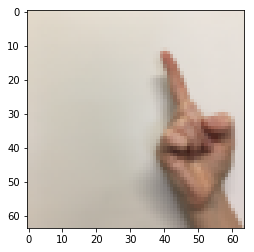

In [ ]:
plt.imshow(X2[1500].astype(int))
print(Y2[0])

In [ ]:
X2=X2/255

In [ ]:
X2=X2.astype(int)

In [ ]:
# X2[1000]